<a href="https://colab.research.google.com/github/fasihere/bat-ball-classification/blob/main/bat_ball.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from fastai.vision import *

In [ ]:
!pip install "torch==1.4" "torchvision==0.5.0"

In [ ]:
folder = 'cricket_ball'
file = 'cricket_ball.csv'

In [ ]:
folder = 'cricket_bat'
file = 'cricket_bat.csv'

In [ ]:
path = Path('data/cricket')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [ ]:
path.ls()

[PosixPath('data/cricket/cricket_ball.csv'),
 PosixPath('data/cricket/cricket_ball'),
 PosixPath('data/cricket/cricket_bat.csv'),
 PosixPath('data/cricket/cricket_bat')]

In [ ]:
classes = ['cricket_bat','cricket_ball']

In [ ]:
download_images(path/file, dest, max_pics=200)

In [ ]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

cricket_bat


cricket_ball


In [ ]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", ds_tfms=get_transforms(),valid_pct=0.2, bs=64, size=224, num_workers=4)
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (288 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
cricket_ball,cricket_ball,cricket_ball,cricket_ball,cricket_ball
Path: data/cricket;

Valid: LabelList (72 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
cricket_bat,cricket_ball,cricket_bat,cricket_bat,cricket_ball
Path: data/cricket;

Test: None

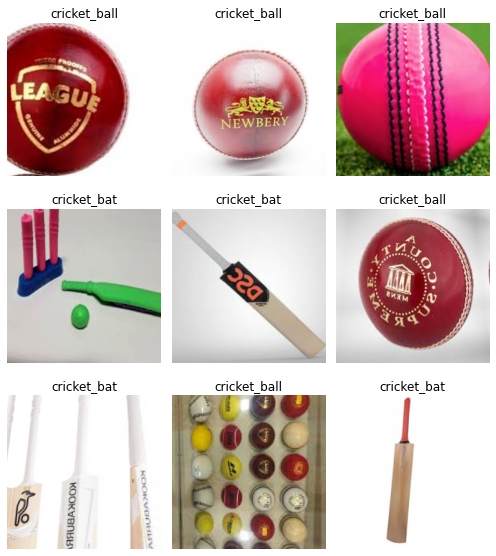

In [ ]:
data.show_batch(rows=3, figsize=(7,8))

In [ ]:
data.classes

['cricket_ball', 'cricket_bat']

In [ ]:
learn = cnn_learner(data, models.resnet18, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


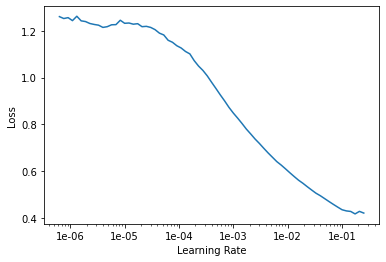

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(4,max_lr=slice(1e-4,1e-1))

epoch,train_loss,valid_loss,error_rate,time
0,0.004179,0.285534,0.027778,00:03
1,0.004872,0.477693,0.027778,00:03
2,0.064884,0.332890,0.027778,00:03
3,0.059887,0.218399,0.013889,00:03


In [ ]:
learn.save('stage1')

In [ ]:
learn.load('stage1')

Learner(data=ImageDataBunch;

Train: LabelList (288 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
cricket_ball,cricket_ball,cricket_ball,cricket_ball,cricket_ball
Path: data/cricket;

Valid: LabelList (72 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
cricket_bat,cricket_ball,cricket_bat,cricket_bat,cricket_ball
Path: data/cricket;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn

In [ ]:
interpret=ClassificationInterpretation.from_learner(learn)

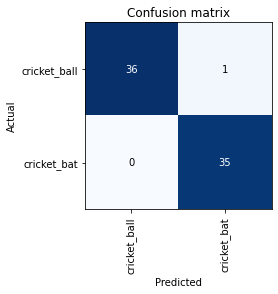

In [ ]:
interpret.plot_confusion_matrix()

In [ ]:
from fastai.widgets import *

In [ ]:
help(interpret.top_losses)

Help on method top_losses in module fastai.train:

top_losses(k: int = None, largest=True) method of fastai.train.ClassificationInterpretation instance
    `k` largest(/smallest) losses and indexes, defaulting to all losses (sorted by `largest`).



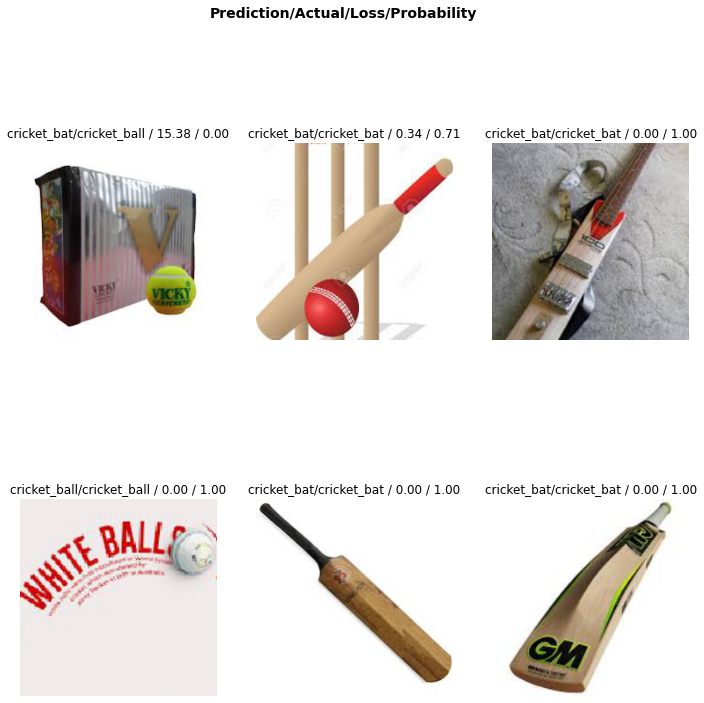

In [ ]:
interpret.plot_top_losses(6)

In [ ]:
learn.export()

In [ ]:
defaults.device = torch.device('cpu')

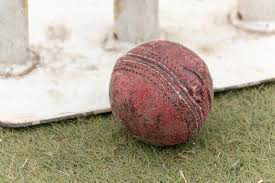

In [ ]:
img = open_image(path/'ball.jpeg')
img

In [ ]:
learn = load_learner(path)

In [ ]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category tensor(0)

In [ ]:
pred_idx

tensor(0)

In [ ]:
outputs

tensor([9.9915e-01, 8.5340e-04])